In [8]:
import pandas as pd 
from glob import glob
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
import codecs

In [5]:
raw_path="/Users/sachin/Downloads/bbc 2"
files = glob("%s/*/*" % raw_path)

In [38]:
df = pd.DataFrame()
for i in files:
    f_parts = i.split("/")
    # print i
    fh = open(i)
    data = unicode(fh.read(), errors='ignore')
    fh.close()
    df = df.append({
        'File_Name': f_parts[6],
        'Complete_Filename': "%s-%s" % (f_parts[6], f_parts[5]), 
        'Content':data, 
        "Category": f_parts[5]}, ignore_index=True)
    
    
    
    
    
    
    

In [41]:
df['News_length'] = df['Content'].str.len()

In [42]:
df.head()

,Category,Complete_Filename,Content,File_Name,News_length
0,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,289.txt,2259
1,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",262.txt,4810
2,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,276.txt,2125
3,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,060.txt,1042
4,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,074.txt,1576


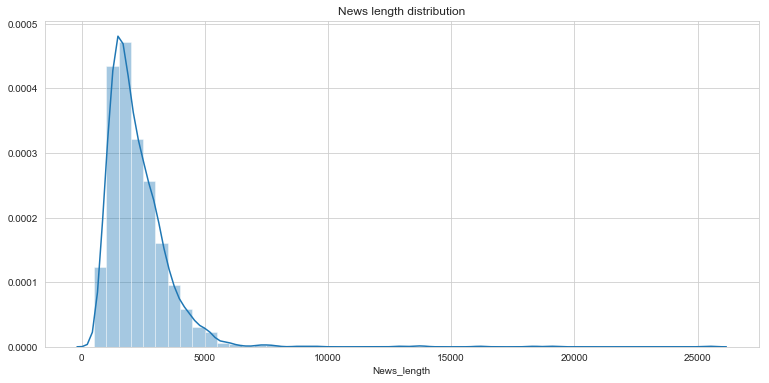

In [43]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [44]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [45]:
df.loc[1]['Content']

u'U2\'s desire to be number one\n\nU2, who have won three prestigious Grammy Awards for their hit Vertigo, are stubbornly clinging to their status as one of the biggest bands in the world.\n\nThe most popular groups in the history of rock all have several things in common. The music must be inspired and appeal across generations and be distinctive, if not always groundbreaking. But such success is down to more than music. They have to be compelling performers, charismatic and intelligent enough to make good decisions and keep their feet on the ground. They also have to want it. They have to want to be the biggest band ever and not stop wanting it. The Beatles had it, the Rolling Stones still have it, REM hold onto it and Queen were it in a catsuit. And U2 have it in spades, and keep churning it out. Their new album, How To Dismantle An Atomic Bomb, comes 28 years after the schoolfriends got together in Dublin and 17 years after The Joshua Tree cemented their place on the all-time rock 

In [46]:
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")

In [55]:
df.head()

,Category,Complete_Filename,Content,File_Name,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4
0,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,289.txt,2259,Musicians to tackle US red tape Musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians to tackle us red tape musicians' gr...
1,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",262.txt,4810,"U2's desire to be number one U2, who have won...","u2's desire to be number one u2, who have won...",u2's desire to be number one u2 who have won ...,u2 desire to be number one u2 who have won th...
2,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,276.txt,2125,Rocker Doherty in on-stage fight Rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty in on-stage fight rock singer ...
3,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,060.txt,1042,Snicket tops US box office chart The film ada...,snicket tops us box office chart the film ada...,snicket tops us box office chart the film ada...,snicket tops us box office chart the film ada...
4,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,074.txt,1576,Ocean's Twelve raids box office Ocean's Twelv...,ocean's twelve raids box office ocean's twelv...,ocean's twelve raids box office ocean's twelv...,ocean twelve raids box office ocean twelve th...


In [48]:
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')

In [50]:
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

In [52]:
punctuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')

In [54]:
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")

In [56]:
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/sachin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


------------------------------------------------------------


[nltk_data] Downloading package wordnet to /Users/sachin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [57]:
wordnet_lemmatizer = WordNetLemmatizer()

In [60]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [62]:
df['Content_Parsed_5'] = lemmatized_text_list

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sachin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [69]:
stop_words = list(stopwords.words('english'))

In [71]:
df['Content_Parsed_6'] = df['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_6'] = df['Content_Parsed_6'].str.replace(regex_stopword, '')

In [73]:
df.head()

,Category,Complete_Filename,Content,File_Name,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,289.txt,2259,Musicians to tackle US red tape Musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians to tackle us red tape musicians' gr...,musicians tackle us red tape musicians' grou...
1,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",262.txt,4810,"U2's desire to be number one U2, who have won...","u2's desire to be number one u2, who have won...",u2's desire to be number one u2 who have won ...,u2 desire to be number one u2 who have won th...,u2 desire to be number one u2 who have win th...,u2 desire number one u2 win three prestig...
2,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,276.txt,2125,Rocker Doherty in on-stage fight Rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty in on-stage fight rock singer ...,rocker doherty -stage fight rock singer pete...
3,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,060.txt,1042,Snicket tops US box office chart The film ada...,snicket tops us box office chart the film ada...,snicket tops us box office chart the film ada...,snicket tops us box office chart the film ada...,snicket top us box office chart the film adap...,snicket top us box office chart film adaptat...
4,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,074.txt,1576,Ocean's Twelve raids box office Ocean's Twelv...,ocean's twelve raids box office ocean's twelv...,ocean's twelve raids box office ocean's twelv...,ocean twelve raids box office ocean twelve th...,ocean twelve raid box office ocean twelve the...,ocean twelve raid box office ocean twelve cr...


In [74]:
list_columns = ["File_Name", "Category", "Complete_Filename", "Content", "Content_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [75]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed
0,289.txt,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,musicians tackle us red tape musicians' grou...
1,262.txt,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",u2 desire number one u2 win three prestig...
2,276.txt,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,rocker doherty -stage fight rock singer pete...
3,060.txt,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,snicket top us box office chart film adaptat...
4,074.txt,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,ocean twelve raid box office ocean twelve cr...


In [76]:
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

In [77]:
df['Category_Code'] = df['Category']

In [78]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,289.txt,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,musicians tackle us red tape musicians' grou...,entertainment
1,262.txt,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",u2 desire number one u2 win three prestig...,entertainment
2,276.txt,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,rocker doherty -stage fight rock singer pete...,entertainment
3,060.txt,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,snicket top us box office chart film adaptat...,entertainment
4,074.txt,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,ocean twelve raid box office ocean twelve cr...,entertainment


In [79]:
df = df.replace({'Category_Code':category_codes})

In [80]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,289.txt,entertainment,289.txt-entertainment,Musicians to tackle US red tape\n\nMusicians' ...,musicians tackle us red tape musicians' grou...,1
1,262.txt,entertainment,262.txt-entertainment,"U2's desire to be number one\n\nU2, who have w...",u2 desire number one u2 win three prestig...,1
2,276.txt,entertainment,276.txt-entertainment,Rocker Doherty in on-stage fight\n\nRock singe...,rocker doherty -stage fight rock singer pete...,1
3,060.txt,entertainment,060.txt-entertainment,Snicket tops US box office chart\n\nThe film a...,snicket top us box office chart film adaptat...,1
4,074.txt,entertainment,074.txt-entertainment,Ocean's Twelve raids box office\n\nOcean's Twe...,ocean twelve raid box office ocean twelve cr...,1


In [81]:
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [87]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [88]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [90]:
features_train = tfidf.fit_transform(X_train).toarray()

In [92]:
labels_train = y_train

In [94]:
print(features_train.shape)

(1891, 300)


In [95]:
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(334, 300)


In [96]:
from sklearn.feature_selection import chi2


In [97]:
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. price
. economy
. growth
. oil
. bank
  . Most correlated bigrams:
. last year
. mr blair

# 'entertainment' category:
  . Most correlated unigrams:
. tv
. music
. star
. award
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. minister
. blair
. party
. election
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. win
. side
. team
. match
. cup
  . Most correlated bigrams:
. prime minister
. say mr

# 'tech' category:
  . Most correlated unigrams:
. microsoft
. technology
. computer
. software
. users
  . Most correlated bigrams:
. mr blair
. say mr



In [98]:
bigrams

[u'tell bbc', u'last year', u'prime minister', u'mr blair', u'say mr']

# Model Training

In [99]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

In [100]:
rf_0 = RandomForestClassifier(random_state = 8)
print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [101]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [103]:
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [104]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)


The best hyperparameters from Random Search are:
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 200, 'max_features': 'sqrt', 'min_samples_split': 2, 'max_depth': 40}

The mean accuracy of a model with these hyperparameters is:
0.9423585404547858


In [106]:
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 3, 4]
n_estimators = [200]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200], 'min_samples_split': [2, 3, 4], 'max_features': ['sqrt'], 'max_depth': [30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [107]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 40}

The mean accuracy of a model with these hyperparameters is:
0.9466666666666667


In [108]:
best_rfc = grid_search.best_estimator_

In [110]:
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [111]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [112]:
rfc_pred = best_rfc.predict(features_test)

In [113]:
rfc_pred

array([2, 3, 0, 1, 0, 1, 0, 1, 3, 2, 3, 0, 2, 4, 3, 1, 4, 2, 3, 4, 2, 1,
       0, 4, 2, 1, 4, 1, 4, 2, 3, 4, 4, 0, 0, 1, 3, 4, 3, 4, 1, 2, 2, 0,
       0, 0, 2, 3, 3, 4, 4, 0, 1, 3, 0, 0, 2, 1, 3, 4, 3, 4, 1, 1, 3, 4,
       0, 3, 3, 4, 4, 0, 2, 2, 3, 2, 2, 0, 4, 1, 4, 4, 3, 4, 3, 4, 2, 4,
       0, 1, 1, 3, 3, 0, 0, 0, 4, 0, 1, 1, 3, 3, 3, 3, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 3, 3, 0, 4, 3, 2, 3, 1, 1, 4, 0, 1, 0, 1, 2, 4, 0, 4, 2,
       1, 2, 3, 4, 2, 3, 0, 1, 3, 2, 2, 0, 2, 0, 0, 0, 3, 0, 2, 1, 3, 4,
       3, 3, 3, 4, 0, 3, 3, 1, 2, 2, 2, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2, 0,
       3, 3, 2, 3, 0, 1, 3, 4, 2, 0, 1, 4, 0, 3, 3, 3, 1, 2, 2, 4, 4, 4,
       0, 1, 4, 3, 0, 4, 4, 4, 4, 4, 2, 2, 1, 3, 0, 0, 3, 2, 3, 1, 4, 1,
       1, 1, 3, 1, 4, 4, 2, 0, 2, 1, 3, 3, 2, 2, 3, 1, 0, 2, 3, 1, 0, 0,
       0, 3, 4, 2, 3, 4, 1, 1, 0, 3, 2, 0, 3, 3, 0, 1, 2, 1, 4, 0, 3, 0,
       0, 2, 4, 3, 3, 4, 3, 4, 0, 2, 3, 2, 1, 4, 3, 0, 4, 0, 3, 2, 0, 2,
       4, 0, 0, 3, 3, 0, 0, 0, 1, 3, 1, 4, 4, 3, 3,

In [115]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [116]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.9760479041916168


In [117]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.97      0.97      0.97        62
           2       0.98      0.97      0.97        60
           3       0.98      0.98      0.98        84
           4       0.98      0.98      0.98        60

   micro avg       0.98      0.98      0.98       334
   macro avg       0.98      0.98      0.98       334
weighted avg       0.98      0.98      0.98       334



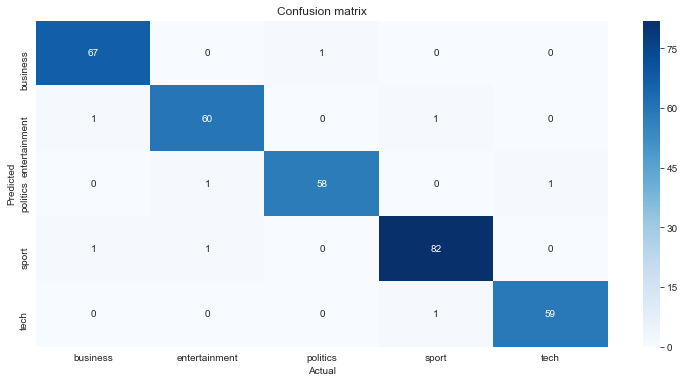

In [118]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [119]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9161676646706587

In [120]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.9760479041916168

In [121]:
best_rfc.predict(["politics democracy defined"])

ValueError: could not convert string to float: politics democracy defined